# Load important libraries 


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import metrics 

# Read dataset

In [20]:
data = pd.read_csv("weather.csv", header=0, sep=',')

In [21]:
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [22]:
data.shape

(366, 22)

# selecting features

In [23]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [24]:
#turning categorical features into numbers
from sklearn.preprocessing import LabelEncoder
Enco= LabelEncoder()
data ["WindGustDir"] = Enco.fit_transform(data["WindGustDir"])
data ["WindDir9am"] =Enco.fit_transform(data ["WindDir9am"])
data ["WindDir3pm"] =Enco.fit_transform(data ["WindDir3pm"])
data ["RainTomorrow"] =Enco.fit_transform(data ["RainTomorrow"])
data ["RainToday"] =Enco.fit_transform(data ["RainToday"])

In [26]:
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3            7   
1     14.0     26.9       3.6          4.4       9.7            1   
2     13.7     23.4       3.6          5.8       3.3            7   
3     13.3     15.5      39.8          7.2       9.1            7   
4      7.6     16.1       2.8          5.6      10.6           10   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0          12           7           6.0  ...           29   
1           39.0           0          13           4.0  ...           36   
2           85.0           3           5           6.0  ...           69   
3           54.0          14          13          30.0  ...           56   
4           50.0          10           2          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6          0   
1       1012.4       1008.4         5         3     17.5     25.7          1   
2       1009.5       1007.2         8         7     15.4     20.2          1   
3       1005.5       1007.0         2         7     13.5     14.1          1   
4       1018.3       1018.5         7         7     11.1     15.4          1   

   RISK_MM  RainTomorrow  
0      3.6             1  
1      3.6             1  
2     39.8             1  
3      2.8             1  
4      0.0             0  

[5 rows x 22 columns]

In [27]:
#split data into x(features) and y(label)
col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM']
X = data[col].values
Y = data['RainTomorrow'].values

In [28]:
print(X.shape)
print(Y.shape)

(366, 21)
(366,)


In [29]:
#to check if theres any nulll values in the dataset
from pandas.core.api import isnull
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustDir      0
WindGustSpeed    2
WindDir9am       0
WindDir3pm       0
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [30]:
#drop nulll values in the dataset
data.dropna(inplace=True)

In [31]:
#check agian if theres any nulll values in the dataset
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

# Data Visulization 

<Figure size 432x288 with 0 Axes>

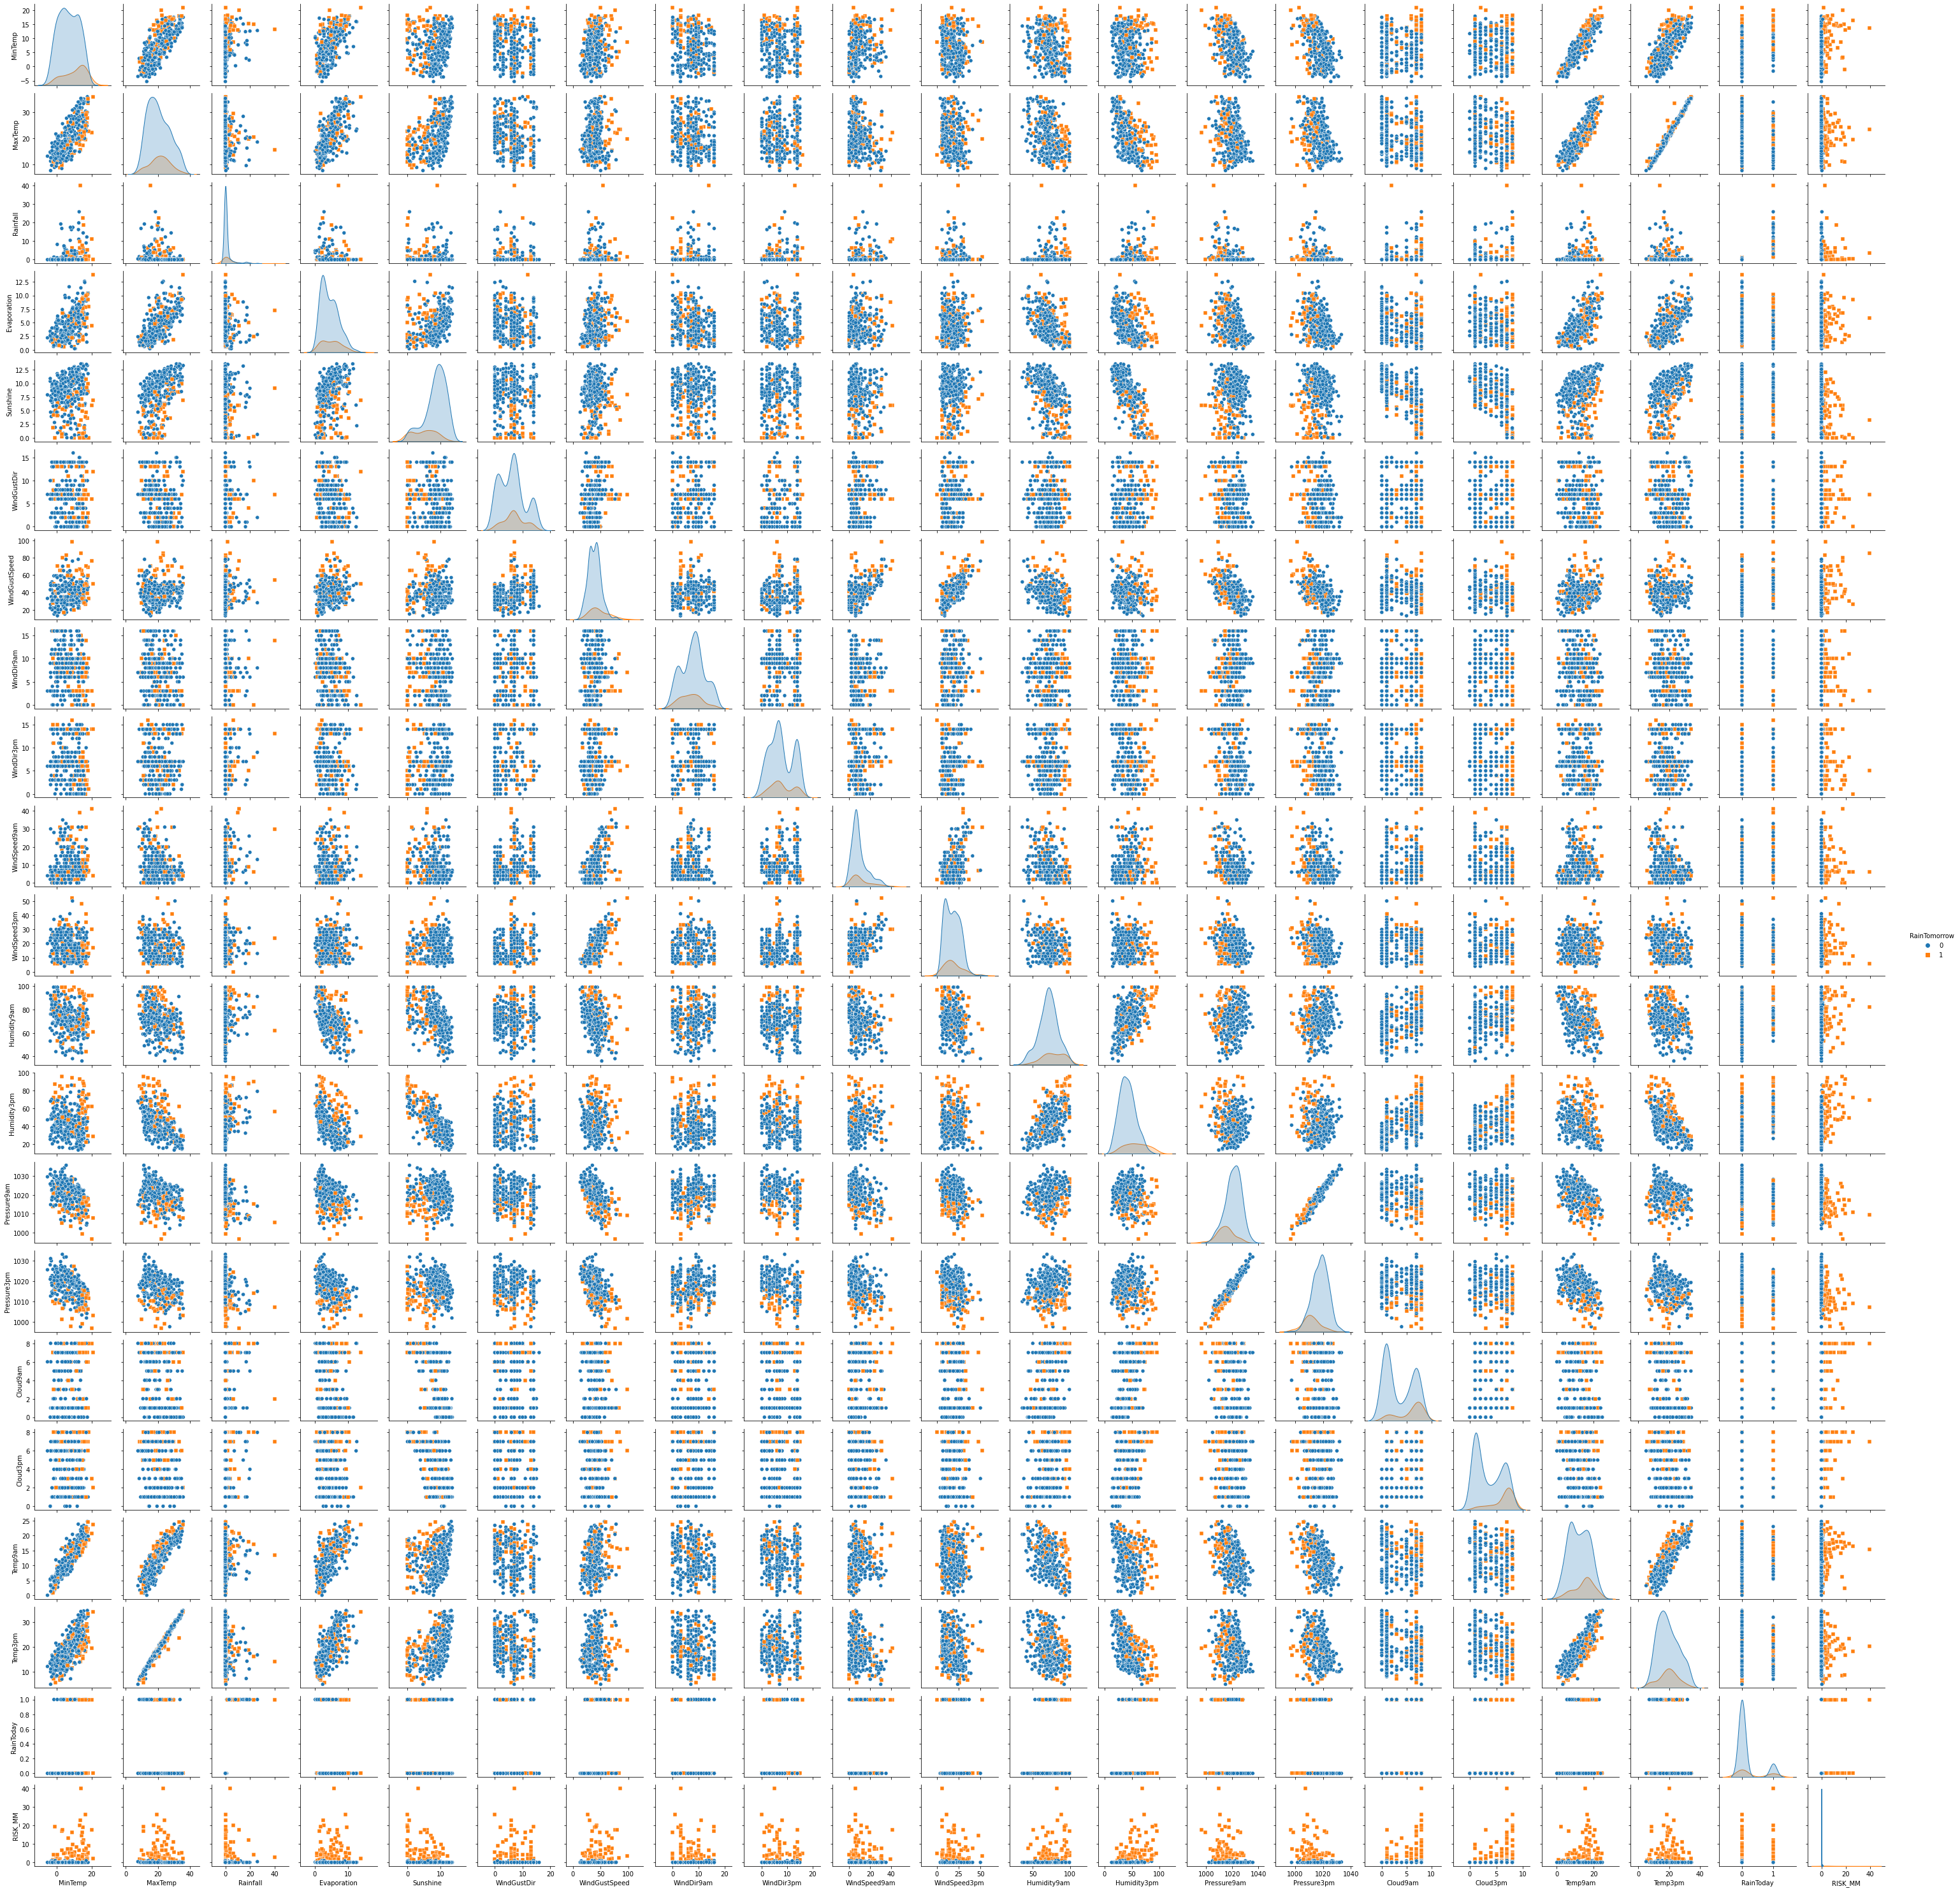

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.pairplot(data, hue = "RainTomorrow", size=2, markers=["o", "s"])
plt.show()

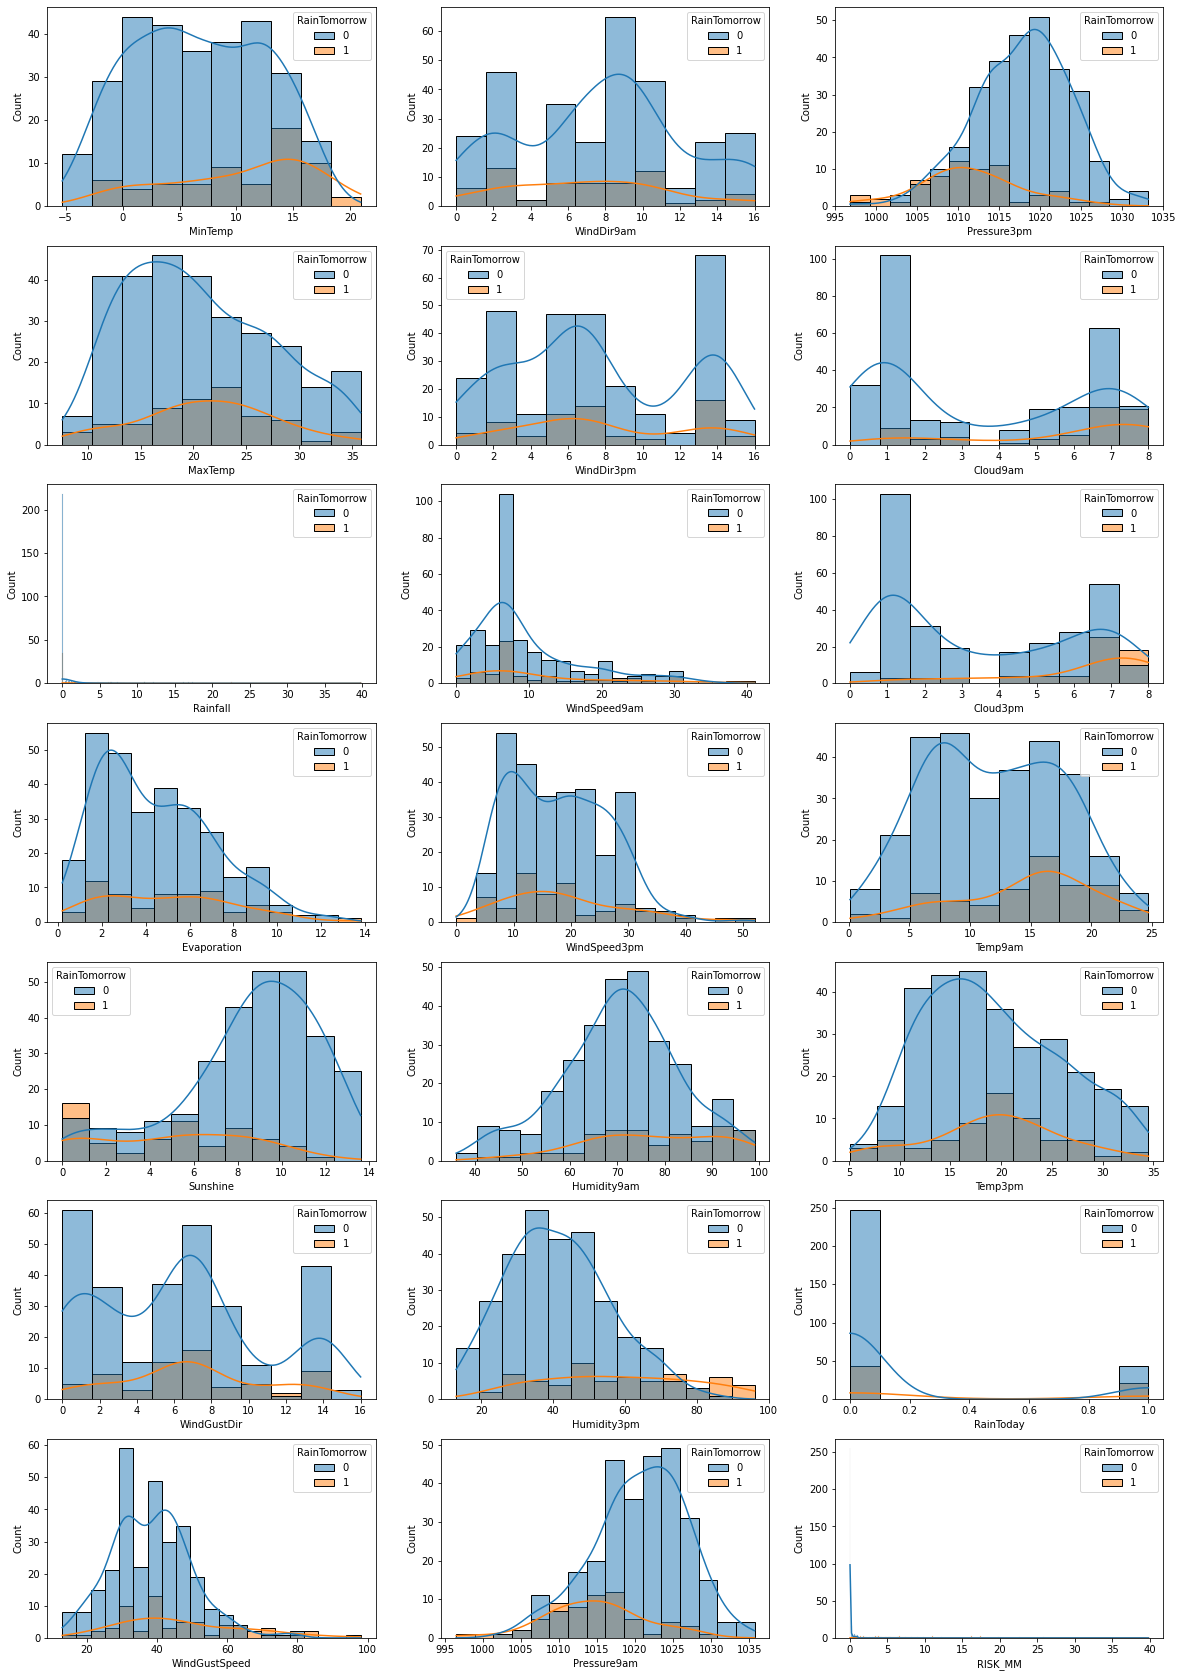

In [43]:
fig, axs = plt.subplots(7, 3, figsize=(20, 30))
place1=0
place2=0
for i in col:
    sns.histplot(data=data, x=i, hue="RainTomorrow", kde=True, color="skyblue", ax=axs[place1, place2])
    if(place1==6):
        place1=0
        place2=place2+1
    else:
        place1=place1+1
plt.show()

# Data normalization 

In [44]:
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(data)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(data)
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)
df_scaled.head(10)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.382775  0.678771  0.000000     0.246377  0.463235       0.4375   
1  0.669856  0.751397  0.090452     0.318841  0.713235       0.0625   
2  0.655502  0.653631  0.090452     0.420290  0.242647       0.4375   
3  0.636364  0.432961  1.000000     0.521739  0.669118       0.4375   
4  0.363636  0.449721  0.070352     0.405797  0.779412       0.6250   
5  0.296651  0.472067  0.000000     0.420290  0.602941       0.5625   
6  0.291866  0.508380  0.005025     0.304348  0.617647       0.5625   
7  0.397129  0.474860  0.000000     0.405797  0.338235       0.0000   
8  0.421053  0.544693  0.000000     0.289855  0.301471       0.5000   
9  0.401914  0.636872  0.407035     0.391304  0.566176       0.0000   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0       0.306122      0.7500      0.4375      0.146341  ...     0.302083   
1       0.397959      0.0000      0.8125      0.097561  ...     0.375000   
2       0.867347      0.1875      0.3125      0.146341  ...     0.718750   
3       0.551020      0.8750      0.8125      0.731707  ...     0.583333   
4       0.510204      0.6250      0.1250      0.487805  ...     0.510417   
5       0.448980      0.5625      0.0000      0.487805  ...     0.593750   
6       0.438776      0.5625      0.1250      0.463415  ...     0.489583   
7       0.418367      0.5625      0.0000      0.268293  ...     0.593750   
8       0.489796      0.0000      0.0625      0.463415  ...     0.500000   
9       0.316327      0.5000      0.1250      0.170732  ...     0.333333   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0     0.984552     0.982385     0.875     0.875  0.582996  0.684058   
1     0.977503     0.975997     0.625     0.375  0.708502  0.744928   
2     0.974703     0.974835     1.000     0.875  0.623482  0.585507   
3     0.970841     0.974642     0.250     0.875  0.546559  0.408696   
4     0.983200     0.985772     0.875     0.875  0.449393  0.446377   
5     0.988510     0.988870     0.875     0.625  0.441296  0.428986   
6     0.989283     0.989353     0.500     0.750  0.502024  0.501449   
7     0.990827     0.991289     0.750     0.875  0.489879  0.449275   
8     0.990731     0.989837     0.875     0.875  0.570850  0.547826   
9     0.988800     0.987902     0.875     0.125  0.538462  0.628986   

   RainToday   RISK_MM  RainTomorrow  
0        0.0  0.090452           1.0  
1        1.0  0.090452           1.0  
2        1.0  1.000000           1.0  
3        1.0  0.070352           1.0  
4        1.0  0.000000           0.0  
5        0.0  0.005025           0.0  
6        0.0  0.000000           0.0  
7        0.0  0.000000           0.0  
8        0.0  0.407035           1.0  
9        1.0  0.000000           0.0  

[10 rows x 22 columns]

In [45]:
X = df_scaled[col].values
Y = data['RainTomorrow'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [46]:
print(x_train.shape)
print(x_test.shape)

(247, 21)
(107, 21)


# Decision Tree (DT) algorithm

In [47]:
from sklearn.model_selection import GridSearchCV
# We will create a parameter grid to select best parameter for the Decision Tree (DT) algorithm
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)

In [48]:
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [51]:
print("Best Hyperparameters :", grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)

Best Hyperparameters : {'max_leaf_nodes': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion= "entropy", random_state=42, max_depth=2, min_samples_leaf=2)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       random_state=42)

In [61]:
from sklearn.tree import export_text
r= export_text(dt_model, feature_names=col)
print(r)

|--- RISK_MM <= 0.03
|   |--- class: 0
|--- RISK_MM >  0.03
|   |--- class: 1



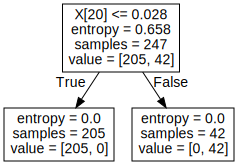

In [63]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display
display(graphviz.Source(export_graphviz(dt_model)))

In [55]:
y_pred= dt_model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        22

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



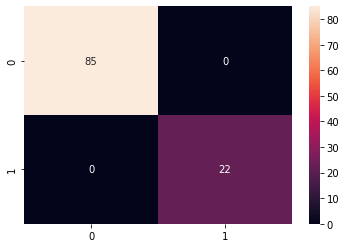

In [58]:
#Compare the prediction values (y_pred) with the original (y_test)
from sklearn.metrics import classification_report, confusion_matrix
re = confusion_matrix(y_test, y_pred)
sns.heatmap(re, annot=True)
print(classification_report(y_test, y_pred))

In [64]:
import sklearn.metrics 
print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_pred)*100,"%")
print('precision : ', sklearn.metrics.precision_score(y_test, y_pred)*100,"%")
print('recall : ', sklearn.metrics.recall_score(y_test, y_pred)*100,"%")
print('F1 : ', sklearn.metrics.f1_score(y_test, y_pred)*100,"%")

accuracy :  100.0 %
precision :  100.0 %
recall :  100.0 %
F1 :  100.0 %


# Support Vector Machine (SVM) algorithm

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# We will create a parameter grid to select best parameter for the # Support Vector Machine (SVM) algorithm
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [68]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.820 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
print("Best Hyperparameters :", grid.best_params_)
print(grid.best_estimator_)

Best Hyperparameters : {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [75]:
svc_model = SVC(C=1000, gamma=0.01 , kernel='rbf')
svc_model.fit(x_train, y_train)

SVC(C=1000, gamma=0.01)

In [78]:
y_pred= svc_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        85
           1       1.00      0.77      0.87        22

    accuracy                           0.95       107
   macro avg       0.97      0.89      0.92       107
weighted avg       0.96      0.95      0.95       107



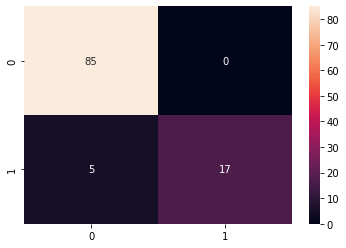

In [79]:
#Compare the prediction values (y_pred) with the original (y_test)
from sklearn.metrics import classification_report, confusion_matrix
re = confusion_matrix(y_test, y_pred)
sns.heatmap(re, annot=True)
print(classification_report(y_test, y_pred))

In [80]:
import sklearn.metrics 
print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_pred)*100,"%")
print('precision : ', sklearn.metrics.precision_score(y_test, y_pred)*100,"%")
print('recall : ', sklearn.metrics.recall_score(y_test, y_pred)*100,"%")
print('F1 : ', sklearn.metrics.f1_score(y_test, y_pred)*100,"%")

accuracy :  95.32710280373831 %
precision :  100.0 %
recall :  77.27272727272727 %
F1 :  87.17948717948718 %


# We find that the best algorithm is Decision Tree (DT)